# Data Prep

This notebook loads different political boundaries and hammers them into the same shape, so the [analysis notebook](./purpleair.ipynb) can toggle easily between them.

In [1]:
import geopandas
import pandas

## LA Supervisorial Districts

In [2]:
sups = geopandas.read_file(
    "data/Final-Map-Shapefiles.zip!Final Map Shapefiles",
)
sups = (
    sups
    .assign(
        label=sups.DistName.apply(lambda x: f"LA Supervisorial District {x}"),
        kind="LA Supervisorial District",
    )
    .rename(columns={"DistName": "district"})
    .astype({"district": "int64"})
    .to_crs(epsg=4326)
    .assign(
        latitude=lambda x: x.representative_point().y,
        longitude=lambda x: x.representative_point().x,
    )
    [["district", "kind", "label", "geometry", "latitude", "longitude"]]
)

ERROR 1: PROJ: proj_create_from_database: Open of /home/ian/miniconda3/envs/dev/share/proj failed


In [3]:
# Hack! Remove the channel islands since they throw resulting plots out of whack
import shapely.ops
sups = sups.clip(shapely.ops.clip_by_rect(sups.unary_union, -120, 33.6, -117, 35))

/home/ian/miniconda3/envs/dev/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [4]:
supervisor_handles = {
    1: "@HildaSolis",
    2: "@HollyJMitchell",
    3: "@LindseyPHorvath",
    4: "@SheilaKuehl",
    5: "@kathrynbarger",
}
sups = sups.merge(
    pandas.DataFrame.from_records(
        tuple(supervisor_handles.items()),
        columns=["district", "handle"]
    ),
    on="district",
)

<AxesSubplot: >

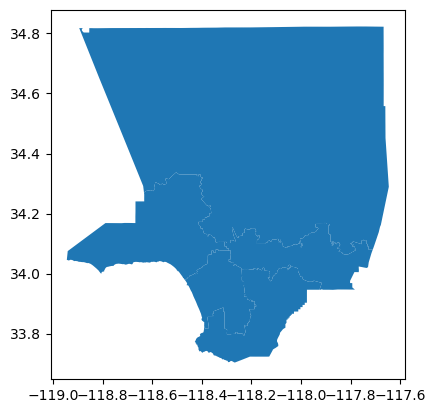

In [5]:
sups.plot()

## LA City Council Districts

In [6]:
la_council_districts = geopandas.read_file("data/LA_City_Council_Districts_(Adopted_2021).geojson")

# Create an envelope with a 1 mile buffer
la_council_districts = (
    la_council_districts
    .assign(
        latitude=la_council_districts.representative_point().y,
        longitude=la_council_districts.representative_point().x,
        kind="LA City Council District",
        label=la_council_districts.District.apply(lambda x: f"LA City Council District {x}"),
    )
    .rename(columns={"District": "district"})
    [["district", "kind", "label", "geometry", "latitude", "longitude"]]
)

la_council_districts

,district,kind,label,geometry,latitude,longitude
0,1,LA City Council District,LA City Council District 1,"POLYGON ((-118.26870 34.04671, -118.26820 34.0...",34.076353,-118.229877
1,2,LA City Council District,LA City Council District 2,"POLYGON ((-118.33733 34.22104, -118.33959 34.2...",34.183152,-118.399710
2,3,LA City Council District,LA City Council District 3,"POLYGON ((-118.54920 34.22053, -118.55014 34.2...",34.180726,-118.597734
3,4,LA City Council District,LA City Council District 4,"POLYGON ((-118.51861 34.20841, -118.51861 34.2...",34.156041,-118.465561
4,5,LA City Council District,LA City Council District 5,"POLYGON ((-118.39160 34.11243, -118.39186 34.1...",34.072524,-118.358653
5,6,LA City Council District,LA City Council District 6,"POLYGON ((-118.36534 34.22871, -118.36649 34.2...",34.212979,-118.467476
6,7,LA City Council District,LA City Council District 7,"POLYGON ((-118.33733 34.22104, -118.33747 34.2...",34.279234,-118.394314
7,8,LA City Council District,LA City Council District 8,"POLYGON ((-118.30028 34.03716, -118.30029 34.0...",33.982995,-118.324997
8,9,LA City Council District,LA City Council District 9,"POLYGON ((-118.23972 34.01480, -118.23972 34.0...",33.998583,-118.269461
9,10,LA City Council District,LA City Council District 10,"POLYGON ((-118.28790 34.06898, -118.28919 34.0...",34.041917,-118.344085


In [7]:
councilor_handles = {
    1: "@EunissesH",
    2: "@PaulKrekorian",
    3: "@BobBlumenfield",
    4: "@cd4losangeles",
    5: "@KatyForLA",
    6: "@CD6LACity",
    7: "@MRodCD7",
    8: "@mhdcd8",
    9: "@CurrenDPriceJr",
    10: "@CW_HeatherHutt",
    11: "@TraciParkforLA",
    12: "@CD12LA",
    13: "@HugoForCD13",
    14: "@kdeleon",  # mayoral campaign account vastly more used than @Kdeleoncd14"
    15: "@McOsker4LA",
}
la_council_districts = la_council_districts.merge(
    pandas.DataFrame.from_records(
        tuple(councilor_handles.items()),
        columns=["district", "handle"]
    ),
    on="district",
)

In [8]:
la_council_districts

,district,kind,label,geometry,latitude,longitude,handle
0,1,LA City Council District,LA City Council District 1,"POLYGON ((-118.26870 34.04671, -118.26820 34.0...",34.076353,-118.229877,@EunissesH
1,2,LA City Council District,LA City Council District 2,"POLYGON ((-118.33733 34.22104, -118.33959 34.2...",34.183152,-118.399710,@PaulKrekorian
2,3,LA City Council District,LA City Council District 3,"POLYGON ((-118.54920 34.22053, -118.55014 34.2...",34.180726,-118.597734,@BobBlumenfield
3,4,LA City Council District,LA City Council District 4,"POLYGON ((-118.51861 34.20841, -118.51861 34.2...",34.156041,-118.465561,@cd4losangeles
4,5,LA City Council District,LA City Council District 5,"POLYGON ((-118.39160 34.11243, -118.39186 34.1...",34.072524,-118.358653,@KatyForLA
5,6,LA City Council District,LA City Council District 6,"POLYGON ((-118.36534 34.22871, -118.36649 34.2...",34.212979,-118.467476,@CD6LACity
6,7,LA City Council District,LA City Council District 7,"POLYGON ((-118.33733 34.22104, -118.33747 34.2...",34.279234,-118.394314,@MRodCD7
7,8,LA City Council District,LA City Council District 8,"POLYGON ((-118.30028 34.03716, -118.30029 34.0...",33.982995,-118.324997,@mhdcd8
8,9,LA City Council District,LA City Council District 9,"POLYGON ((-118.23972 34.01480, -118.23972 34.0...",33.998583,-118.269461,@CurrenDPriceJr
9,10,LA City Council District,LA City Council District 10,"POLYGON ((-118.28790 34.06898, -118.28919 34.0...",34.041917,-118.344085,@CW_HeatherHutt


## Write back out

In [9]:
districts = pandas.concat([sups, la_council_districts])
districts.to_file("data/districts.geojson")